In [ ]:
import sklearn as sk
import pandas as pd

In [ ]:
## Option 1 ##: 
# Read data by uploading a file
from google.colab import files
uploaded = files.upload()

Saving stories1.csv to stories1.csv
Saving cbow_word_vectors.csv to cbow_word_vectors.csv


In [ ]:
# If you read your data by files uploading (above cell)
import io
df = pd.read_csv(io.BytesIO(uploaded['Obrist2014_Smell_5_1.csv']))
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df[['T_TitleOfExp', 'T_Trigger']]
df.columns = ['title', 'trigger']
print(df.head())

# Read augmented db
df_aug = pd.read_csv('/content/augmented_with_backtrans.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_aug.head()

                     title                                            trigger
0   It Wasn't Gas I Passed  The smell was in comparison to rotten eggs and...
1      The Foul Litter box  Whenever I walked into my brother's apartment ...
2        I Can't Smell You  I, just tonight, had a coworker fart in my off...
3    Dragon Breath Teacher  Once a teacher yelled at me during class. She ...
4  The day I took a plunge  I was playing in a field with my friends when ...


text categoryNumber
0  It Wasn't Gas I Passed. The smell was in compa...           cat8
1  It Wasn't Gas I Passed. was in comparison rott...           cat8
2  information technology Wasn't vaunt single Pas...           cat8
3  information technology has not been passed. wa...           cat8
4  The Foul Litter box. Whenever I walked into my...           cat8

###Combining title and stories 

In [ ]:
# Create an empty df for better computation speed
indices = [x for x in range(len(df))]
df_text = pd.DataFrame(columns=['text'], index=indices)

In [ ]:
# Now doing row-wise combinination of title and text
for index, row in df.iterrows():
    df_text.iloc[index]['text'] = (row.title).strip() + ". " + (row.trigger).strip()

In [ ]:
df = df_text
del df_text
df

text
0    It Wasn't Gas I Passed. The smell was in compa...
1    The Foul Litter box. Whenever I walked into my...
2    I Can't Smell You. I, just tonight, had a cowo...
3    Dragon Breath Teacher. Once a teacher yelled a...
4    The day I took a plunge. I was playing in a fi...
5    Eau d'Homeless (aka Why I Should Carry Febreze...
6    Stinky Pits. My daughter came into my room and...
7    too much. I put on too much cologne when I was...
8    People. I attended a seminar in which I had to...
9    Accidental compliments. I washed my clothes wi...
10   Positive licorice scent. I found out I like li...
11   Meat Fail. I walked into a meatshop, and the s...
12   B&C Incense. This was the last day of filming ...
13   The thousand dollar smell.. A few years ago we...
14   The Overwhelming Odor of Hops. I was pregnant ...
15   Pungent Supermarket Smell. I guess one of the ...
16   Cat Crap... Ohhh that smell!!!. I have three c...
17   Saved by the Smell!. Among many things in my s...
18   Accidental vegetarian. I was pregnant, so I wa...
19   Pregnancy. When I was pregnant anything that s...
20   Smell of death. I remember the smell of a nurs...
21   The Aroma that Recollects an Antecedent Amigo ...
22   Bread in the oven. The first time I ever made ...
23   Chipotle. The most memorable smell experience ...
24   Smells of subway. One day i decided to go to s...
25   Comforting sweater scent. My old grirfriend us...
26   White Lilac Sheets. My brother arrived at my h...
27   The Road to Sous Chef. I remember the first da...
28   bakery. The first time I walked into a bakery,...
29   Beginning of winter coffee.. I absolutely love...
30   Homemade Bread. Coming home from a bad day at ...
31   Thanksgiving smells of childhood. I am one of ...
32   Get Home to a Wonderful Meal. I was having a r...
33   Laughing with Cookies. I remember walking into...
34   Airplane Odor. I hate to travel and one thing ...
35   ER Odors and Funk. Entering an emergency room ...
36   Frosting Donuts. The smell of a donut shop, or...
37   The smell of an Ex. My scent memory has to do ...
38   Redbull. Everytime I smell red bull I think of...
39   No curry for you!. The smell of rotting Indian...
40   Gramma. When my gramma was dying she had sores...
41   Dead Body. The first time that I smelled a dec...
42   The End of his life , beginning of flowers.. T...
43   Everyday Scents. the smell I am thinking of is...
44   My Grandpa's Money Machine. When I was extreme...
45   moms cookies. I like of the smell of moms cook...
46   grandfather. My grandfather smoked a pipe. Sme...
47   Dramatic Smells. I remember walking onto a hos...
48   Sauerkraut and mothballs. I remember when I wa...
49   My trip to the zoo. Going to the zoo as a chil...
50   Mamaw's Closet. I went into my grandmother's c...
51   Bay Air. Driving down the shore to Wildwood, N...
52   Smells Like Mamaw's House. Everytime we would ...
53   The smell of Christmas. The smell of cinnamon ...
54   Peppery Shame. I remember the peppery smell of...
55   Car Crash. When I was 16 I crashed my car into...
56   First Time At The Nursing Home. My mom was tra...
57   Mommy Dearest's Perfume Makes Vomit Bloom. My ...
58   Smellerific. I drank (nearly) an entire 750ml ...
59   pine tree. When I was a kid, I was sledding in...
60   smell of new house. I remember when I was 8 ye...
61   The Smell of My Past. I once dated a guy that ...
62   The Essence of  Surgery. One particular memora...
63   Death and it's presence. The smell that most s...
64   When my mother died. I remember when I went to...
65   My Moms Purse. The most memorable smell is the...
66   The best part of waking up. When I was young a...
67   The Smell of Coffee in the Morning. The smell ...
68   Schools Out. Every spring, The smell of a sunn...
69   Funnel Cakes of Joy. My childhood wasn't the g...
70   First ejaculation. When I was twelve, I had my...
71   Boyfriend's cologne; bringing back memories fr...
72   Changing Alex. The first time 

###Remove punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['text']=df['text'].map(lambda x: remove_punctuation(x))
print(df.head(10))


df_aug['text']=df_aug['text'].map(lambda x: remove_punctuation(x))
df_aug.head()


                                                text
0  It Wasnt Gas I Passed The smell was in compari...
1  The Foul Litter box Whenever I walked into my ...
2  I Cant Smell You I just tonight had a coworker...
3  Dragon Breath Teacher Once a teacher yelled at...
4  The day I took a plunge I was playing in a fie...
5  Eau dHomeless aka Why I Should Carry Febreze A...
6  Stinky Pits My daughter came into my room and ...
7  too much I put on too much cologne when I was ...
8  People I attended a seminar in which I had to ...
9  Accidental compliments I washed my clothes wit...


text categoryNumber
0  It Wasnt Gas I Passed The smell was in compari...           cat8
1  It Wasnt Gas I Passed was in comparison rotten...           cat8
2  information technology Wasnt vaunt single Pass...           cat8
3  information technology has not been passed was...           cat8
4  The Foul Litter box Whenever I walked into my ...           cat8

In [ ]:
!pip install unidecode
#print(df.head(10))
#print(df_aug.head())
import unidecode
def remove_accents(text):
  #print(text)
  #unaccented_string = unidecode.unidecode(text)
  #return unaccented_string
  no_punct=[unidecode.unidecode(words) for words in text]
  words_wo_punct=''.join(no_punct)
  return words_wo_punct

# df_aug['text']=df_aug['text'].map(lambda x: remove_accents(x))
# df_aug.head()

# df['text']=df['text'].map(lambda x: remove_accents(x))
# df.head(10)

###Tokenization - Tokenizing is the process of splitting strings into a list of words. Here, “\W+” splits on one or more non-word character

In [ ]:
import re
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['text']=df['text'].map(lambda x: tokenize(str(x)))
df.head()


df_aug['text']=df_aug['text'].map(lambda x: tokenize(str(x)))
df_aug.head()

text categoryNumber
0  [It, Wasnt, Gas, I, Passed, The, smell, was, i...           cat8
1  [It, Wasnt, Gas, I, Passed, was, in, compariso...           cat8
2  [information, technology, Wasnt, vaunt, single...           cat8
3  [information, technology, has, not, been, pass...           cat8
4  [The, Foul, Litter, box, Whenever, I, walked, ...           cat8

###Remove stop word - Stop words are irrelevant words that won’t help

In [ ]:
import nltk 
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])
def remove_stopwords(text):
    #Lowercased it 
    # filtered_words = [w for w in text if len(w) > 2 if not w in stopwords.words('english')]
    text = [word.lower() for word in text]
    text=[word for word in text if len(word) > 2 if not word in stopword]
    return text


df['text'] = df['text'].map(lambda x: remove_stopwords(x))
df.head()

df_aug['text']=df_aug['text'].map(lambda x: remove_stopwords(x))
df_aug.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


text categoryNumber
0  [wasnt, gas, passed, smell, comparison, rotten...           cat8
1  [wasnt, gas, passed, comparison, rotten, eggs,...           cat8
2  [information, technology, wasnt, vaunt, single...           cat8
3  [information, technology, passed, comparable, ...           cat8
4  [foul, litter, box, whenever, walked, brothers...           cat8

In [ ]:
#join all sentence into one string
def joinSentence(sentence):
    return " ".join(sentence)



sentences = df_aug['text'].apply(lambda s:joinSentence(s))
corpus = " ".join(sentences)
corpus = corpus.split()
print(corpus)



sentences2 = df['text'].map(lambda s:joinSentence(s))
#corpus2 = " ".join(sentences2)
print(sentences2)

processedData = []

for element in df['text']:
  processedData.append((" ").join(element))

print(processedData)


['wasnt', 'gas', 'passed', 'smell', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'source', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'get', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'gone', 'longer', 'smelled', 'like', 'wasnt', 'gas', 'passed', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'longer', 'smelled', 'like', 'information', 'technology', 'wasnt', 'vaunt', 'single', 'passed', 'comparability', 'crappy', 'testis', 'cause', 'memorable', 'flavour', 'orgasm', 'mouth', 'lowly', 'board', 'broad', 'citizenry', 'arrogate', 'mortal', 'bring', 'gaseous', 'state', 'humil

###Stemming is the process of reducing a word to its root form.

In [ ]:
#stemming using porter stemmer -> reduces words to their base words

nltk.download('wordnet')
from nltk.stem.porter import *
p_stemmer = PorterStemmer()

def stem(text):
    text=[p_stemmer.stem(word) for word in text]
    return text

df['text'] = df['text'].map(lambda x: stem(x))

#df.to_csv('cleaned_stories.csv') 
#files.download('cleaned_stories.csv')
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


text
0  [wasnt, ga, pass, smell, comparison, rotten, e...
1  [foul, litter, box, whenev, walk, brother, apa...
2  [cant, smell, tonight, cowork, fart, offic, le...
3  [dragon, breath, teacher, teacher, yell, class...
4  [day, took, plung, play, field, friend, trip, ...

Lemmatising



In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma(text):
  lemma_words=[lemmatizer.lemmatize(w) for w in text]
  return lemma_words

df['text'] = df['text'].map(lambda x: lemma(x))
print(df.head())

processedData = []

for element in df['text']:
  processedData.append((" ").join(element))

print(processedData)

                                                text
0  [wasnt, ga, pas, smell, comparison, rotten, eg...
1  [foul, litter, box, whenev, walk, brother, apa...
2  [cant, smell, tonight, cowork, fart, offic, le...
3  [dragon, breath, teacher, teacher, yell, class...
4  [day, took, plung, play, field, friend, trip, ...
['wasnt ga pas smell comparison rotten egg reason memor sourc smell come mouth small room full peopl assum someon releas ga embarrass fes real sourc needle say call mom come get left quickli could sure figur sourc gone longer smell like', 'foul litter box whenev walk brother apart smell hit immedi entir live room fill smell urin fece lesser extent whole apart smell eman gigant red litter pan sit right besid entranceway unfortun brother roommat four ador cat could never keep litter pan clean smell deaden sen made feel bit dizzi urin strong smell like noxiou mix chemic smile tri gag cat cute stink certainli didnt mention later knew fault help drag belong tri breath mouth inha

###Pos tagging 

In [ ]:
# required for tokenization
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

corpus = " ".join(corpus)
print(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like wasnt gas passed comparison rotten eggs reason memorable smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come left quickly could sure figured source longer smelled like information technology wasnt vaunt single passed comparability crappy testis cause memorable flavour orgasm mouth lowly board broad citizenry arrogate mortal bring gaseous state humiliated fes genuine source uncalled enou

In [ ]:
from nltk import word_tokenize, pos_tag

def positionOfTagSentence(sentence):
    sentence = " ".join(sentence)
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

In [ ]:
df['text'] = df['text'].apply(lambda s:positionOfTagSentence(s))
df.head()


text
0  [(wasnt, NN), (ga, NN), (pas, NN), (smell, NN)...
1  [(foul, NN), (litter, NN), (box, NN), (whenev,...
2  [(cant, NN), (smell, NN), (tonight, NN), (cowo...
3  [(dragon, NN), (breath, NN), (teacher, NN), (t...
4  [(day, NN), (took, VBD), (plung, JJ), (play, N...

In [ ]:
print(df['text'])

0      [(wasnt, NN), (ga, NN), (pas, NN), (smell, NN)...
1      [(foul, NN), (litter, NN), (box, NN), (whenev,...
2      [(cant, NN), (smell, NN), (tonight, NN), (cowo...
3      [(dragon, NN), (breath, NN), (teacher, NN), (t...
4      [(day, NN), (took, VBD), (plung, JJ), (play, N...
5      [(eau, NN), (dhomeless, NN), (aka, IN), (carri...
6      [(stinki, NN), (pit, NN), (daughter, NN), (cam...
7      [(much, JJ), (put, VBD), (much, JJ), (cologn, ...
8      [(peopl, JJ), (attend, NN), (seminar, NN), (wo...
9      [(accident, NN), (compliment, NN), (wash, NN),...
10     [(posit, NN), (licoric, JJ), (scent, NN), (fou...
11     [(meat, NN), (fail, NN), (walk, NN), (meatshop...
12     [(incens, NNS), (last, JJ), (day, NN), (film, ...
13     [(thousand, CD), (dollar, NN), (smell, NN), (y...
14     [(overwhelm, JJ), (odor, NN), (hop, NN), (preg...
15     [(pungent, NN), (supermarket, NN), (smell, NN)...
16     [(cat, NN), (crap, NN), (ohhh, NN), (smell, VB...
17     [(save, VB), (smell, NN)

###CBOW: Method 1

In [ ]:
# import numpy as np
# import keras.backend as K
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Lambda
# from keras.utils import np_utils
# from keras.preprocessing import sequence
# from keras.preprocessing.text import Tokenizer
# import gensim

# vectorize = Tokenizer()
# vectorize.fit_on_texts(processedData)
# smell_data = vectorize.texts_to_sequences(processedData)
# total_vocab = sum(len(s) for s in smell_data)
# word_count = len(vectorize.word_index) + 1
# window_size = 2

In [ ]:
# def cbow_model(data, window_size, total_vocab):
#     total_length = window_size*2
#     for text in data:
#         text_len = len(text)
#         for idx, word in enumerate(text):
#             context_word = []
#             target   = []            
#             begin = idx - window_size
#             end = idx + window_size + 1
#             context_word.append([text[i] for i in range(begin, end) if 0 <= i < text_len and i != idx])
#             target.append(word)
#             contextual = sequence.pad_sequences(context_word)
#             final_target = np_utils.to_categorical(target, total_vocab)
#             yield(contextual, final_target) 

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim=total_vocab, output_dim=100, input_length=window_size*2))
# # word_model.add(Embedding(vocab_size, embed_size,weights=[embedding_matrix],input_length=1,trainable=False))
# model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(100,)))
# model.add(Dense(total_vocab, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam')
# for i in range(10):
#     cost = 0
#     for x, y in cbow_model(smell_data, window_size, total_vocab):
#         cost += model.train_on_batch(x, y)
#     print(i, cost)

###CBOW: Method 2:

In [ ]:
# import torch
# import torch.nn as nn

# def make_context_vector(context, word_to_ix):
#     idxs = [word_to_ix[w] for w in context]
#     return torch.tensor(idxs, dtype=torch.long)

# CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
# EMDEDDING_DIM = 100

# raw_text = """We are about to study the idea of a computational process.
# Computational processes are abstract beings that inhabit computers.
# As they evolve, processes manipulate other abstract things called data.
# The evolution of a process is directed by a pattern of rules
# called a program. People create programs to direct processes. In effect,
# we conjure the spirits of the computer with our spells.""".split()


# # By deriving a set from `raw_text`, we deduplicate the array
# vocab = set(raw_text)
# vocab_size = len(vocab)

# word_to_ix = {word:ix for ix, word in enumerate(vocab)}
# ix_to_word = {ix:word for ix, word in enumerate(vocab)}

# data = []
# for i in range(2, len(raw_text) - 2):
#     context = [raw_text[i - 2], raw_text[i - 1],
#                raw_text[i + 1], raw_text[i + 2]]
#     target = raw_text[i]
#     data.append((context, target))


# class CBOW(torch.nn.Module):
#     def __init__(self, vocab_size, embedding_dim):
#         super(CBOW, self).__init__()

#         #out: 1 x emdedding_dim
#         self.embeddings = nn.Embedding(vocab_size, embedding_dim)
#         self.linear1 = nn.Linear(embedding_dim, 128)
#         self.activation_function1 = nn.ReLU()
        
#         #out: 1 x vocab_size
#         self.linear2 = nn.Linear(128, vocab_size)
#         self.activation_function2 = nn.LogSoftmax(dim = -1)
        

#     def forward(self, inputs):
#         embeds = sum(self.embeddings(inputs)).view(1,-1)
#         out = self.linear1(embeds)
#         out = self.activation_function1(out)
#         out = self.linear2(out)
#         out = self.activation_function2(out)
#         return out

#     def get_word_emdedding(self, word):
#         word = torch.tensor([word_to_ix[word]])
#         return self.embeddings(word).view(1,-1)


# model = CBOW(vocab_size, EMDEDDING_DIM)

# loss_function = nn.NLLLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# #TRAINING
# for epoch in range(50):
#     total_loss = 0

#     for context, target in data:
#         context_vector = make_context_vector(context, word_to_ix)  

#         log_probs = model(context_vector)

#         total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

#     #optimize at the end of each epoch
#     optimizer.zero_grad()
#     total_loss.backward()
#     optimizer.step()

# #TESTING
# context = ['People','create','to', 'direct']
# context_vector = make_context_vector(context, word_to_ix)
# a = model(context_vector)

# #Print result
# print(f'Raw text: {" ".join(raw_text)}\n')
# print(f'Context: {context}\n')
# print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')

In [ ]:
print(processedData)

print(corpus)

corpus = [corpus]
print(corpus)

['wasnt ga pas smell comparison rotten egg reason memor sourc smell come mouth small room full peopl assum someon releas ga embarrass fes real sourc needle say call mom come get left quickli could sure figur sourc gone longer smell like', 'foul litter box whenev walk brother apart smell hit immedi entir live room fill smell urin fece lesser extent whole apart smell eman gigant red litter pan sit right besid entranceway unfortun brother roommat four ador cat could never keep litter pan clean smell deaden sen made feel bit dizzi urin strong smell like noxiou mix chemic smile tri gag cat cute stink certainli didnt mention later knew fault help drag belong tri breath mouth inhal eventu left room order keep retch still like cat vow never let cat litter pan stink terribl', 'cant smell tonight cowork fart offic left left came window made snif gestur ask smell yet act like didnt keep satisfact insid actual becom quiet nauseat play cool gone quickli ran bottl air freshen spray whole room smell 

###CBOW: Method 3

In [ ]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(corpus)
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corpus]

vocab_size = len(word2id)
embed_size = 100
window_size = 4 # 2 context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 9358
Vocabulary Sample: [('smell', 1), ('time', 2), ('one', 3), ('day', 4), ('iodine', 5), ('first', 6), ('would', 7), ('scent', 8), ('like', 9), ('smelled', 10)]


In [ ]:
import numpy as np
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['wasnt', 'gas', 'passed', 'smell', 'rotten', 'eggs', 'reason', 'memorable'] -> Target (Y): comparison
Context (X): ['gas', 'passed', 'smell', 'comparison', 'eggs', 'reason', 'memorable', 'source'] -> Target (Y): rotten
Context (X): ['passed', 'smell', 'comparison', 'rotten', 'reason', 'memorable', 'source', 'smell'] -> Target (Y): eggs
Context (X): ['smell', 'comparison', 'rotten', 'eggs', 'memorable', 'source', 'smell', 'coming'] -> Target (Y): reason
Context (X): ['comparison', 'rotten', 'eggs', 'reason', 'source', 'smell', 'coming', 'mouth'] -> Target (Y): memorable
Context (X): ['rotten', 'eggs', 'reason', 'memorable', 'smell', 'coming', 'mouth', 'small'] -> Target (Y): source
Context (X): ['eggs', 'reason', 'memorable', 'source', 'coming', 'mouth', 'small', 'room'] -> Target (Y): smell
Context (X): ['reason', 'memorable', 'source', 'smell', 'mouth', 'small', 'room', 'full'] -> Target (Y): coming
Context (X): ['memorable', 'source', 'smell', 'coming', 'small', 'room',

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-03-07 11:22:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-07 11:22:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-07 11:22:37--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import os
import numpy as np


path_to_glove_file = os.path.join(
    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
)

# f = open('../input/glove6b/glove.6B.300d.txt')

# embeddings_index = {}
# with open(path_to_glove_file) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs

# print("Found %s word vectors." % len(embeddings_index))

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 100)            935800    
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 9358)              945158    
Total params: 1,880,958
Trainable params: 945,158
Non-trainable params: 935,800
_________________________________________________________________
None


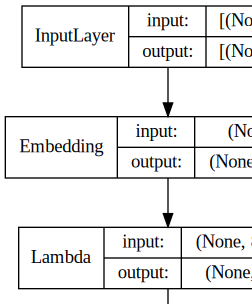

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size,weights=[embedding_matrix], input_length=window_size*2, trainable=False))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
for epoch in range(1, 10):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 694332.6267217249

Epoch: 2 	Loss: 734175.1322717965

Epoch: 3 	Loss: 768555.4322330412

Epoch: 4 	Loss: 798783.9702224471

Epoch: 5 	Loss: 825167.0060924459

Epoch: 6 	Loss: 848696.2062628358

Epoch: 7 	Loss: 871497.5353847207

Epoch: 8 	Loss: 889335.2194821588

Epoch: 9 	Loss: 906521.33733639



In [ ]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).to_csv('cbow_word_vectors.csv')
# df.to_csv('elements.csv', sep='\t')


(9357, 100)


In [ ]:
from google.colab import files
files.download('cbow_word_vectors.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances


# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)


# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['smell', 'rotten', 'beer', 'aroma', 'scent']}

similar_words

NameError: ignored

In [ ]:
print(weights)

print("id2word")
print(id2word)

print("word2id")
print(word2id)

[[ 0.20753   0.33918   0.79457  ... -0.4179   -0.036046  0.24041 ]
 [-0.024221 -0.034855  0.3571   ... -0.087568  0.25961   0.050783]
 [-0.22557   0.49418   0.4861   ... -0.45744   0.49646   0.34906 ]
 ...
 [ 0.37703   0.46232  -0.087843 ...  0.15352  -0.74723   0.35562 ]
 [-0.062474  0.50921  -0.32466  ... -0.71011   0.29012  -0.030208]
 [ 0.2886    0.32231  -0.70201  ... -0.44473   0.26637   0.46354 ]]
id2word
{1: 'smell', 2: 'time', 3: 'one', 4: 'day', 5: 'iodine', 6: 'first', 7: 'would', 8: 'scent', 9: 'like', 10: 'smelled', 11: 'number', 12: 'house', 13: 'atomic', 14: 'back', 15: 'remember', 16: 'could', 17: 'new', 18: 'get', 19: 'information', 20: 'technology', 21: 'sense', 22: 'smells', 23: 'home', 24: 'ace', 25: 'every', 26: 'memorable', 27: 'unity', 28: 'experience', 29: 'something', 30: 'really', 31: 'single', 32: 'always', 33: 'car', 34: 'perfume', 35: 'take', 36: 'made', 37: 'air', 38: 'feel', 39: 'think', 40: 'feeling', 41: 'olfactory', 42: 'good', 43: 'years', 44: 'ever',

In [ ]:
import pandas

usecols = []

for i in range(1,99):
  usecols.append(i)


df = pandas.read_csv('cbow_word_vectors.csv', usecols=usecols)
print(df)

# compute pairwise distance matrix
distance_matrix = euclidean_distances(df)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['smell', 'rotten', 'beer', 'aroma', 'scent']}

similar_words

             0         1         2  ...        95        96        97
0     0.207530  0.339180  0.794570  ...  0.065984 -0.318300 -0.417900
1    -0.024221 -0.034855  0.357100  ... -0.302950  0.198650 -0.087568
2    -0.225570  0.494180  0.486100  ...  0.137840 -0.343590 -0.457440
3    -0.366890  0.415400  0.134780  ...  0.049695  0.572270  0.024380
4     0.039663  0.924610  0.635300  ... -0.815970  0.292600 -1.119100
...        ...       ...       ...  ...       ...       ...       ...
9352 -0.214570 -0.309150  0.185290  ...  0.191210 -0.430280 -0.044790
9353 -0.039058  0.604780 -0.142360  ... -0.316460  0.093698  0.400620
9354  0.377030  0.462320 -0.087843  ...  0.501260 -0.012356  0.153520
9355 -0.062474  0.509210 -0.324660  ... -0.673430 -0.708790 -0.710110
9356  0.288600  0.322310 -0.702010  ... -0.103640  0.116970 -0.444730

[9357 rows x 98 columns]
(9357, 9357)


NameError: ignored

###Summing all vectors

In [ ]:
 df_vectors = pd.read_csv('cbow_word_vectors.csv')
 df_vectors.head()

Unnamed: 0         0         1  ...        97        98        99
0       time  0.207530  0.339180  ... -0.417900 -0.036046  0.240410
1        one -0.024221 -0.034855  ... -0.087568  0.259610  0.050783
2        day -0.225570  0.494180  ... -0.457440  0.496460  0.349060
3     iodine -0.366890  0.415400  ...  0.024380  0.221060  0.431690
4      first  0.039663  0.924610  ... -1.119100 -0.415630 -0.024249

[5 rows x 101 columns]

In [ ]:
df_new = pd.read_csv('/content/stories1.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_new.head()
#print(len(df_new))
#df_new['text'] = df_new['col']
df_new.head()

print(str(df_new.loc[4]))
story = str(df_new.loc[5])
print(story)
print(story.split())
#df_new
df_new['text_split']=df_new['col'].map(lambda x: remove_accents(x))
df_new['text_split'] = df_new['text_split'].apply(lambda s:s.split())


df_new

col    bush pile smell pungent smeared embarrassed sm...
Name: 4, dtype: object
col    dhomeless ordinary typical live urban fair rag...
Name: 5, dtype: object
['col', 'dhomeless', 'ordinary', 'typical', 'live', 'urban', 'fair', 'rag...', 'Name:', '5,', 'dtype:', 'object']


col  \
0    smell rotten eggs memorable smell mouth small ...   
1    foul litter smell hit entire smell urine lesse...   
2    smell coworker fart didnt quiet nauseated cool...   
3     dragon yelled close smell bad much worse focused   
4    bush pile smell pungent smeared embarrassed sm...   
5    dhomeless ordinary typical live urban fair rag...   
6                      stinky next deodorant stunk bad   
7                much much cologne strong long noticed   
8     seminar different smell asia several puke behave   
9    accidental washed tide sport strong much much ...   
10   positive licorice licorice deodorant liked sme...   
11   meatshop smell pungent sick overbearing vegeta...   
12   last large sound green video smell incense mus...   
13   smell spouse liked local fresh blacktop affect...   
14   overwhelming hops pregnant restaurant brews ov...   
15   pungent smell memorable recall smell fiesta bo...   
16   cat ohhh smell litter unpleasant bag cat litte...   
17   smell many sexualpersonal smell smell importan...   
18   accidental vegetarian pregnant sensitive parti...   
19   pregnant raw sick touch handle sick smell pert...   
20   smell smell stale negative smell smell smell d...   
21   aroma recollects antecedent amigo memories sce...   
22   oven first bread unemployed try present save f...   
23   chipotle memorable smell chipotle first smell ...   
24   subway subway first first subway favorite rest...   
25   comforting sweater old wash tide detergent par...   
26   white guest master king earlier uhaul old love...   
27   sous chef first kitchen distinguishable able s...   
28        first wanted smell amazing single stop smell   
29   smell black friday exhausted angry dark middle...   
30   homemade bad house smell bread wasnt uncommon ...   
31   thanksgiving front house nice last thanksgivin...   
32   wonderful long hungry hungry cranky wonderful ...   
33   kitchen bowl pan smell happy draw kitchen spen...   
34   smell stuffy stale smell old smell stale worst...   
35   funk intense smell alcohol smell mop mopped si...   
36   smell donut general memories bakery old awful ...   
37   smell scent cologne worn associate specific sc...   
38   redbull smell red bull red cant red bull bad s...   
39   curry smell indian indian club cooked curry ho...   
40   gramma gramma bad smell flesh come flesh unabl...   
41   dead first memorable human corpse depressing h...   
42   end smell sad smell strong smell close much sm...   
43   everyday smell dad deoderant wouldnt able comm...   
44   grandpas young grandpa upstairs personal grand...   
45                                   smell whole house   
46                                                pipe   
47   dramatic hospital surgery smell smell reminds ...   
48   sauerkraut walked house smell sauerkraut house...   
49        zoo zoo zoo definite smell zoo smell excited   
50   mamaws toys stacks smelled little musty comfor...   
51   bay wildwood best certain smell stuck stayed b...   
52   mamaws house house mississippi particular smel...   
53   smell christmas smell cinnamon reminds christm...   
54   peppery peppery smell spray strong wasnt negat...   
55   radio easiest recall smell airbag wasnt less d...   
56   first live sick visit smell different smell sm...   
57   mommy bloom particular heavy flower horrendous...   
58   smellerific drank entire 750ml bottle southern...   
59   pine backyard hit hard large pine collarbone s...   
60   smell new house old new house distraught house...   
61   smell dated guy specific cologne brokeup bad b...   
62   particular memorable smell cleaner clean gurne...   
63   presence smell stands hospital medicinal smell...   
64                    hospital clean antiseptic strong   
65   memorable smell smell smell right smell imposs...   
66           best young smell happy smell coffee cabin   
67                      smell smell read smell reminds   
68   smell sunny clear cool reminds end little ki

In [ ]:
import numpy as np
df_vectors.keys()
vectors = {}
for i in range(len(df_vectors)) : 
  listVector = [i for i in df_vectors.loc[i]]
  vectors[df_vectors.loc[i, "Unnamed: 0"]] = np.array(listVector)

for key in vectors:
  vectors[key] = vectors[key][1:]
  vectors[key] = vectors[key].astype(np.float)



In [ ]:
# print(corpus2)
# corpus2 = [corpus2]
# print(corpus2)

# print(processedData)


processedData = df_new['col'].to_list()

print(processedData)


['smell rotten eggs memorable smell mouth small full assumed embarrassed fess real needless sure', 'foul litter smell hit entire smell urine lesser extent whole smell gigantic red litter pan right unfortunately adorable litter pan clean smell dizzy urine strong noxious mix tried cute didnt mention fault drag breathe mouth inhale vow litter pan', 'smell coworker fart didnt quiet nauseated cool bottle freshener sprayed whole smell worse long puke', 'dragon yelled close smell bad much worse focused', 'bush pile smell pungent smeared embarrassed smelled terrible hot sun smell worse humiliating', 'dhomeless ordinary typical live urban fair ragged homeless wander stop sudden dirty homeless individual aisle smell alcohol unmistakable musk aisle several physical presence right next smell bad open fresh decided next little late', 'stinky next deodorant stunk bad', 'much much cologne strong long noticed', 'seminar different smell asia several puke behave', 'accidental washed tide sport strong mu

In [ ]:
newColForVectors = []

def addBoth(v1, v2):
  res = np.array([0.0 for i in range(0,100)])
  for i in range(len(v1)):
    res[i] = v1[i] + v2[i]
  return res


for i in range(len(processedData)):
  listOfWords = processedData[i].split(' ')
  currentSum = np.array([0.0 for i in range(0,100)])
  for word in listOfWords:
    if word in vectors:
      currentSum = addBoth(currentSum, vectors[word])
  newColForVectors.append(currentSum)

# df['vectors'] = pd.Series(newColForVectors)


print(newColForVectors) 
df_vectorised = pd.DataFrame(newColForVectors)



[array([ -1.32834   ,   4.71248   ,   1.042832  ,  -0.275588  ,
        -0.592245  ,   0.78394   ,   1.473457  ,   1.6150276 ,
         0.1538507 ,  -0.5840795 ,  -0.183701  ,  -3.754588  ,
         1.1721514 ,  -0.175989  ,   1.0766    ,  -0.122742  ,
        -0.4293089 ,   2.785852  ,  -5.5746687 ,   1.787351  ,
         0.885787  ,   0.9333081 ,   0.598355  ,  -1.06845   ,
         0.909994  ,  -0.81078317,  -0.3024332 ,  -3.57056   ,
        -0.505274  ,  -2.98099   ,  -1.852305  ,   2.912982  ,
         0.6590641 ,  -2.200488  ,   0.737249  ,   3.29428   ,
         0.45154   ,   1.651036  ,   1.929     ,  -2.885007  ,
        -1.191522  ,  -2.17364   ,  -0.229834  ,  -1.817418  ,
         0.8800029 ,  -0.441862  ,   1.202971  ,  -1.425903  ,
        -0.374045  ,  -5.201339  ,   1.578071  ,  -0.178213  ,
         0.764795  ,   5.60847   ,  -1.266916  , -15.77234   ,
         0.869698  ,   1.2404562 ,  12.97582   ,   2.61473   ,
        -3.10322   ,   7.050509  ,  -2.312685  ,  -1.1

In [ ]:
df_vectorised

0          1         2         3         4          5         6   \
0   -1.328340   4.712480  1.042832 -0.275588 -0.592245   0.783940  1.473457   
1    0.865583   7.942819  9.614050 -4.592513 -5.012027   4.009270  5.276421   
2   -1.570192   1.269008  2.451683 -1.451367  1.025674   4.104780 -0.395392   
3    1.223330   1.768271  0.521910  1.041802  1.187430   1.279020  0.147655   
4   -0.746317   3.768670  1.053769  0.006604  0.594753   2.592891  1.986211   
5    2.455526   3.420548  8.692489 -1.121799 -4.493875   7.362199 -3.744133   
6    1.804786   0.856930  0.879780 -0.044375  0.175200   2.925750  0.177250   
7    0.449270   1.563319  2.532321 -1.534142 -1.352779  -0.232230  0.710420   
8    1.262371   1.144069  2.630780 -1.702115 -2.737860   1.557870 -0.676820   
9    1.663736   6.819283  3.568655 -3.635711  2.742687   2.792356  1.590430   
10  -0.659748   0.966130  0.645026 -0.237270 -2.324313   2.068260 -1.697858   
11   0.807030   0.827770  0.550882  0.383890 -1.287120   0.447550  0.514695   
12  -1.529378   1.306138  1.343720 -1.295226 -2.237660   1.315585 -2.376398   
13   0.041840   5.958390  3.398813 -2.642655 -2.631991   5.444359 -2.013197   
14   1.199724   0.985062  2.514910 -3.111546 -4.395604   2.301959 -2.547262   
15   0.760883   4.487558  4.982895 -0.583046 -1.967457  -0.254750  2.434309   
16  -0.830341   4.154418  1.175297  0.429210 -4.047347  -2.996294 -1.287390   
17   1.994511   6.687125  7.882829 -1.269344 -1.860377   2.708178 -2.545755   
18  -0.803778   1.057744  2.382090 -1.287802  1.642533   3.468787 -0.345526   
19  -0.015730   0.859443  3.368569 -2.356200 -2.347840   0.488020  0.351303   
20  -0.727660   3.109070  2.288707 -0.179495 -1.256699   0.335440 -0.591912   
21   0.399688   6.999439  3.015520 -1.504484  1.146675   5.956442 -2.529876   
22   2.926669   8.162710  8.649823 -4.879596 -2.517346   3.021241 -2.850435   
23  -0.830850   2.639558  0.288320 -0.135435 -0.998388   1.990188  1.457150   
24   0.755764   6.228167  5.094589 -3.044338 -2.301582   4.571346 -0.489610   
25  -3.143808   2.736097 -0.972846 -0.929576  0.051038  -0.209257 -0.671144   
26   1.416743   2.648059  6.408449 -3.710679 -4.696569   5.458441 -1.467760   
27   1.185904   2.950084  5.721393 -0.494507  0.423002   1.499488  0.448120   
28   0.153264   1.608455  1.596370 -0.776071 -1.156796   0.484147 -1.195730   
29  -0.959274   3.156945  2.304339 -0.885521 -1.227002   3.189991  0.034939   
30   0.214190   3.261751  2.788403 -2.628247 -0.581843   4.872878 -2.631880   
31   1.873958   5.378083  7.362014 -2.130674 -5.559729  -0.220680 -2.779403   
32  -0.533334   4.892573  8.476179 -5.436895 -2.020839   4.314901 -2.434046   
33  -0.615252   2.945820  6.530186 -3.594580 -2.712666   3.343740  0.528402   
34   1.133930   5.514117  1.800080 -3.210121 -5.657638   4.724801  2.076287   
35  -2.251475   4.461435  1.094700  1.351322 -0.423404  -0.325824  0.172727   
36   2.485797   3.650770  1.564453 -1.892353 -2.361308   6.099468  0.470452   
37  -0.495481   3.341231  4.667752 -3.345630 -3.507527   0.367228 -2.753359   
38  -1.581265   0.553754 -0.250565 -1.177823  1.126150   2.326516 -0.134485   
39  -2.303410  -0.250214 -1.161590 -0.719441  1.015880   3.121547  3.350270   
40   2.420033   4.043280 -2.882997 -1.579787  0.386587   6.235269  0.463567   
41   1.462183   1.031680  2.780936 -2.039520 -3.771470   3.644762  0.066846   
42  -1.155172   5.428700  1.470680 -0.572910 -3.536787   3.027458 -1.243320   
43  -0.026987   1.791079  2.632194 -1.214050 -1.471361   3.468180 -1.396789   
44  -2.853070   1.380330  0.988716 -4.911037 -2.142808   0.560984 -3.840566   
45  -1.003780   0.948360 -0.088467  0.444237  0.513542   0.317467  0.455060   
46  -0.312750  -0.355730  0.813010  0.077122 -1.022200   0.393090 -0.482460   
47  -1.589721   1.920940  0.049770 -1.099644 -2.639580  -0.054563  1.094890   
48  -2.087958   6.388412  4.680115  0.394578  1.589724   6.645280 -1.120824   
49  -3.347167   2.296300 -1.115600  0.778250  1.024746   4.61

In [ ]:
glove_cbow = df_vectorised.to_csv('GloVe_cbow_augmented_data_with_backtrans_nouns_adj.csv', index = True) 
print('\nCSV String:\n', glove_cbow) 


CSV String:
 None
